In [1]:
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import Net
from torchvision import transforms

sys.path.insert(0, '../..')
from train import train
from dataset import psf_dataset, splitDataLoader, ToTensor, Normalize

In [2]:
model = Net()

# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model.to(device)

Net(
  (conv1): Conv2d(2, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(40, 20, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5120, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=20, bias=True)
)

In [3]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [4]:
# Data set
data_dir = '../../dataset/'
dataset_size = 10
dataset = psf_dataset(
    root_dir=data_dir,
    size=dataset_size,
    transform=transforms.Compose([Normalize(data_dir),
                                  ToTensor()])
)

In [5]:
train(model, dataset, optimizer, criterion,
        split=[0.9, 0.1],
        batch_size=32,
        n_epoch=20,
        random_seed=42,
        model_dir='./')

Training started on cpu
[1/20] Train loss: 22086.484375 
[1/20] Validation loss: 17315.000000 
[1/20] Time: 0.429291 s
------------------------------
[2/20] Train loss: 21874.533203 
[2/20] Validation loss: 17529.150391 
[2/20] Time: 0.418864 s
------------------------------
[3/20] Train loss: 21435.777344 
[3/20] Validation loss: 19642.935547 
[3/20] Time: 0.553609 s
------------------------------
[4/20] Train loss: 21365.832031 
[4/20] Validation loss: 18659.117188 
[4/20] Time: 0.467766 s
------------------------------
[5/20] Train loss: 21065.871094 
[5/20] Validation loss: 17792.728516 
[5/20] Time: 0.491786 s
------------------------------
[6/20] Train loss: 21014.455078 
[6/20] Validation loss: 17373.173828 
[6/20] Time: 0.471805 s
------------------------------
[7/20] Train loss: 21068.501953 
[7/20] Validation loss: 17189.310547 
[7/20] Time: 0.577602 s
------------------------------
[8/20] Train loss: 21099.039062 
[8/20] Validation loss: 17130.259766 
[8/20] Time: 0.530245 s

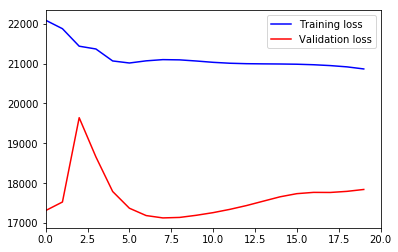

In [7]:
import matplotlib.pyplot as plt
import json

with open('metrics.json') as f:
    metrics = json.load(f)

plt.figure()
plt.plot(metrics['train_loss'], label='Training loss', color='blue')
plt.plot(metrics['val_loss'], label='Validation loss', color='red')
plt.legend()
plt.xlim(0, 20)
plt.show()

In [12]:
import os

# Load 
state_dict = torch.load(os.path.join('./', 'model.pth'))
#new_state_dict = OrderedDict()
#for k, v in state_dict.items():
#    name = k[7:] # remove module.
#    new_state_dict[name] = v
model.load_state_dict(state_dict)